In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


## DATA LOADING

In [2]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400
for column in df.select_dtypes(include ='object').columns:
    print('_'*30)
    print(df[column].value_counts())
    print('_'*30)


______________________________
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
______________________________
______________________________
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
______________________________
______________________________
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
______________________________
______________________________
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
______________________________


In [7]:
print('-'*30)
print(df.isnull().sum()[df.isnull().sum()>0])
print('-'*30)
print(df.isnull().sum()[df.isnull().sum()>0]*100/df.shape[0])
print('-'*30)

------------------------------
person_emp_length     895
loan_int_rate        3116
dtype: int64
------------------------------
person_emp_length    2.747000
loan_int_rate        9.563856
dtype: float64
------------------------------


In [8]:
df[df.isnull().sum()[df.isnull().sum()>1].index]

,person_emp_length,loan_int_rate
0,123.0,16.02
1,5.0,11.14
2,1.0,12.87
3,4.0,15.23
4,8.0,14.27
...,...,...
32576,1.0,13.16
32577,4.0,7.49
32578,3.0,10.99
32579,5.0,11.48


In [9]:
df[df.isnull().sum()[df.isnull().sum()>1].index].describe()

,person_emp_length,loan_int_rate
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


In [10]:
for column in df.isnull().sum()[df.isnull().sum()>1].index:
    print('-'*30)
    print(df[column].value_counts())
    print('-'*30)


------------------------------
person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64
------------------------------
------------------------------
loan_int_rate
7.51     756
10.99    749
7.49     645
7.88     642
5.42     594
7.90     573
11.49    488
9.99     463
13.49    454
6.03     448
11.71    418
8.49     415
6.62     414
5.79     395
7.29     381
8.90     365
5.99     358
9.63     355
12.69    342
9.91     342
6.99     340
12.53    336
11.99    335
7.14     333
10.65    332
10.37    306
12.42  

In [11]:
for column in df.isnull().sum()[df.isnull().sum()>1].index:
    df[column].fillna(df[column].mean(), inplace =True)

/tmp/ipykernel_18/1544465275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace =True)


In [12]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
df.duplicated().sum()

165

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.790488,9593.845632,11.016733,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.088378,6322.730241,3.083040,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## EXPLORATORY DATA ANALYSIS

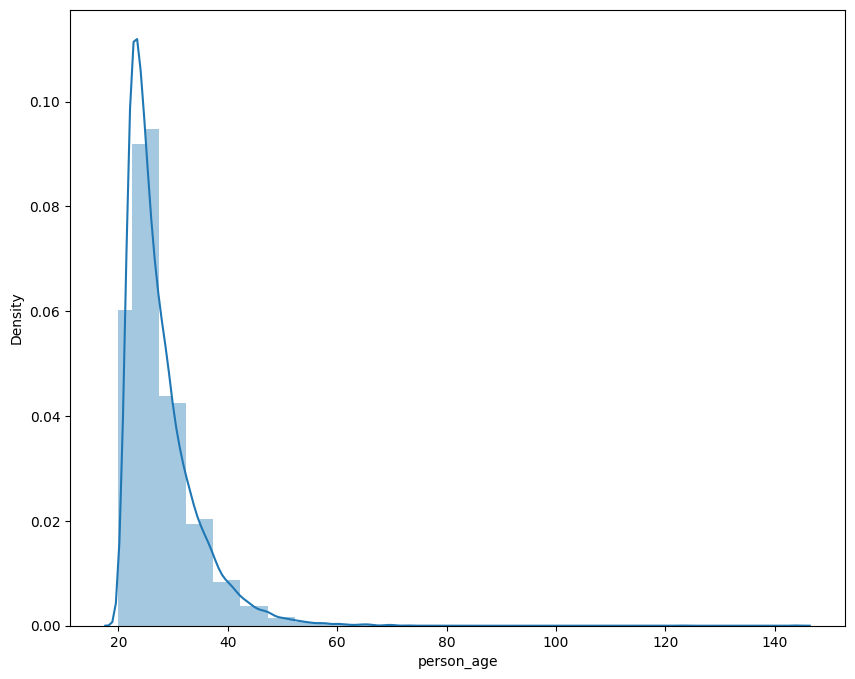

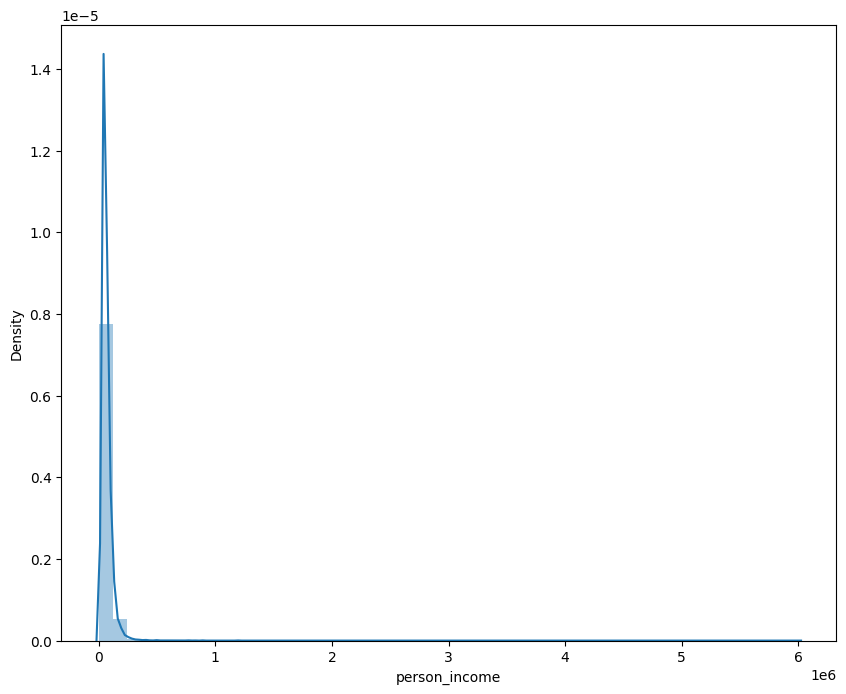

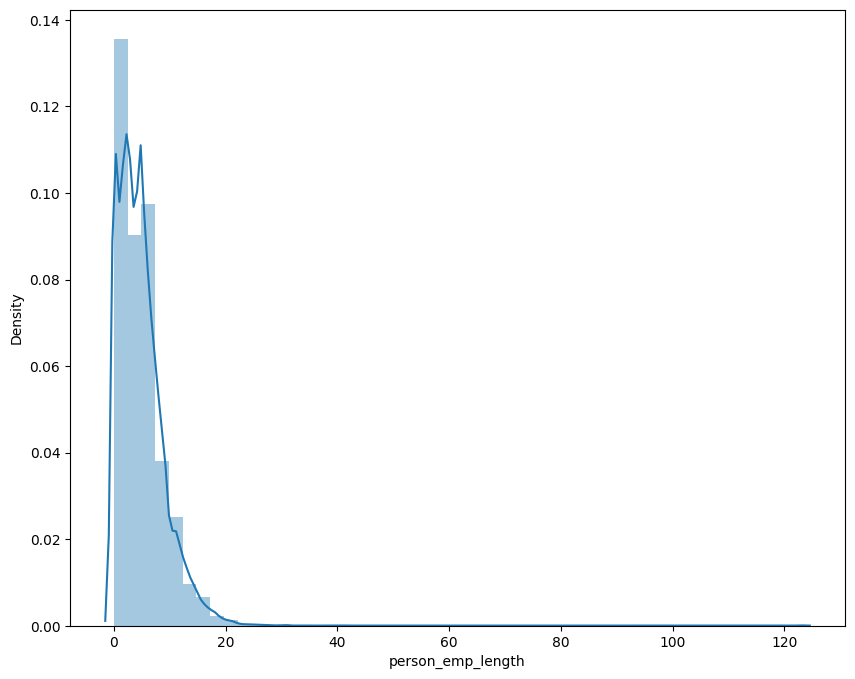

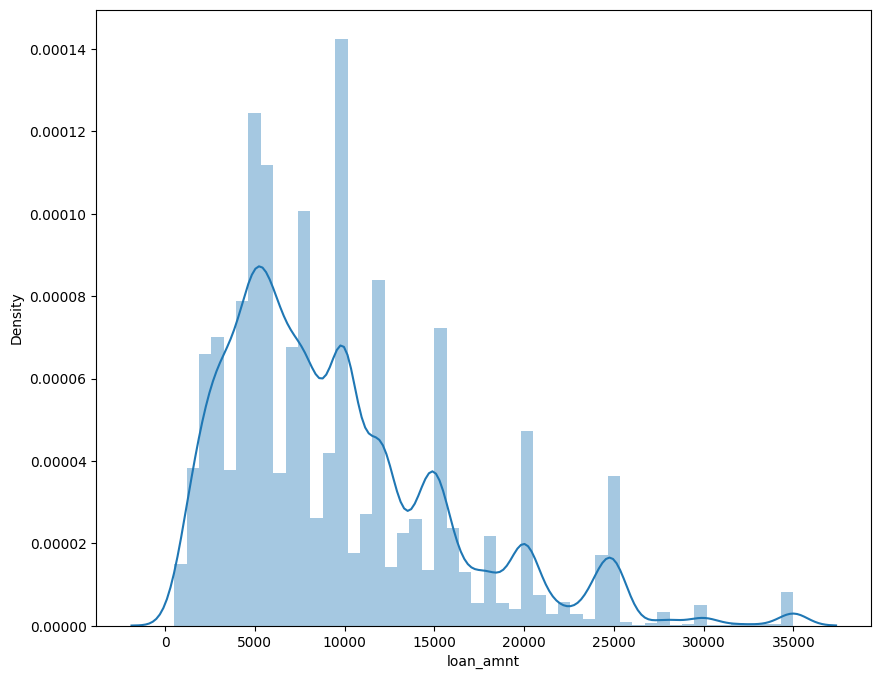

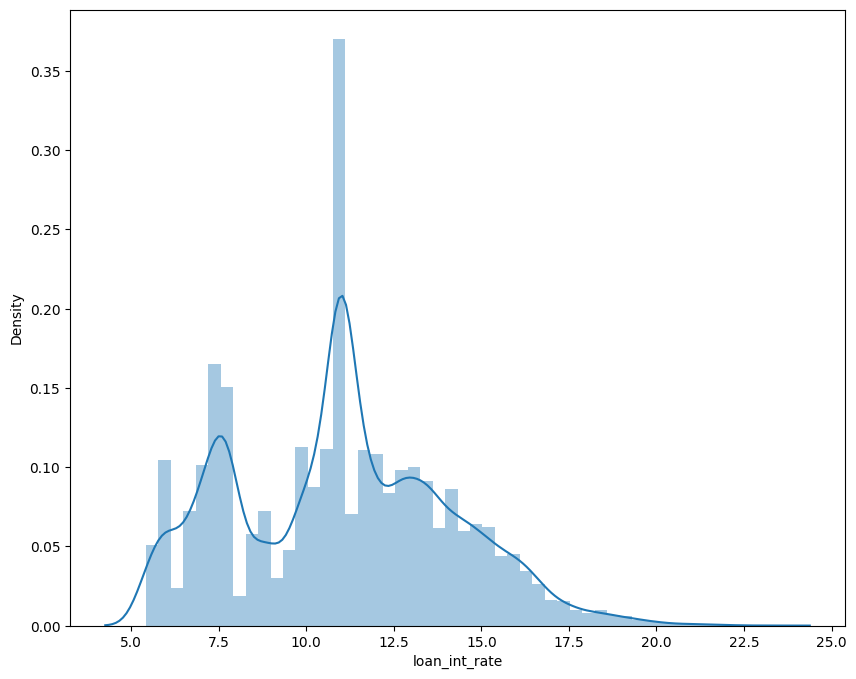

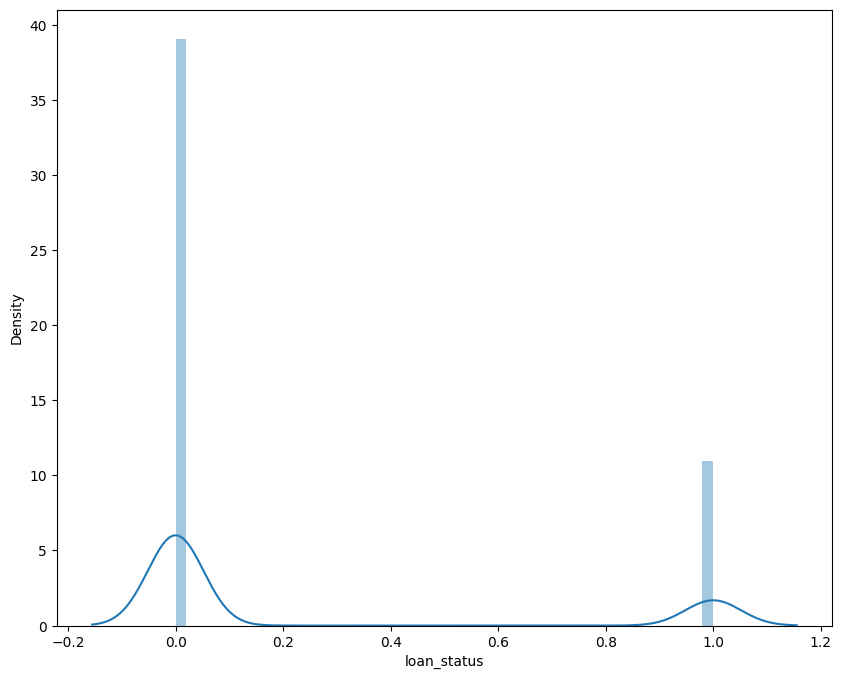

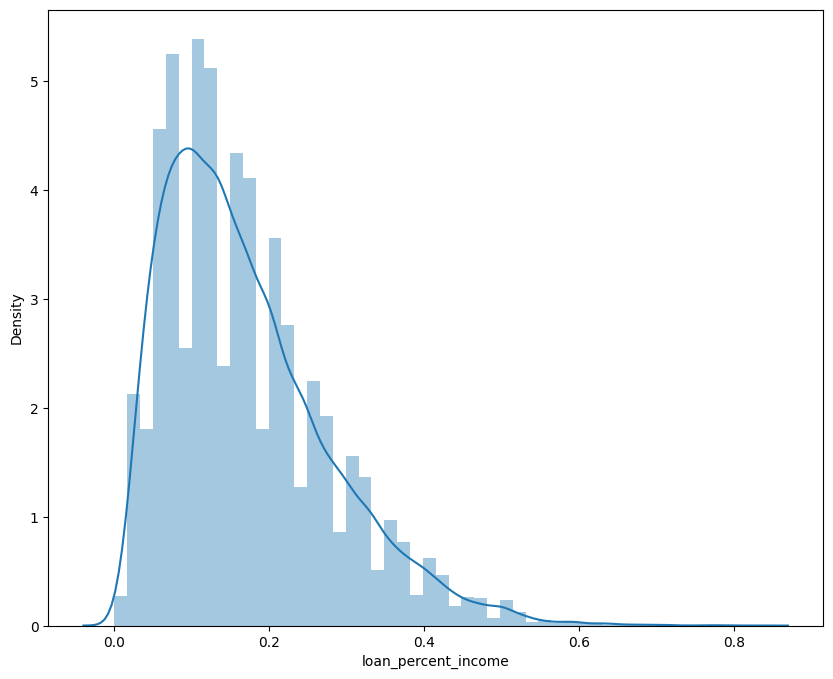

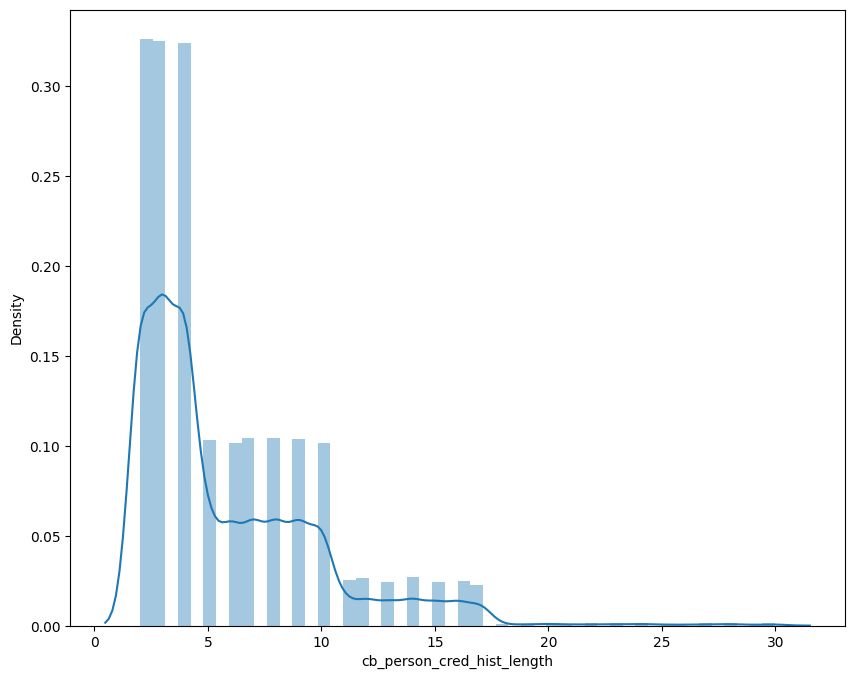

In [16]:
import warnings
warnings.filterwarnings('ignore')
for column in df.select_dtypes(exclude = 'object'):
    plt.figure(figsize=(10,8))
    sns.distplot(df[column])

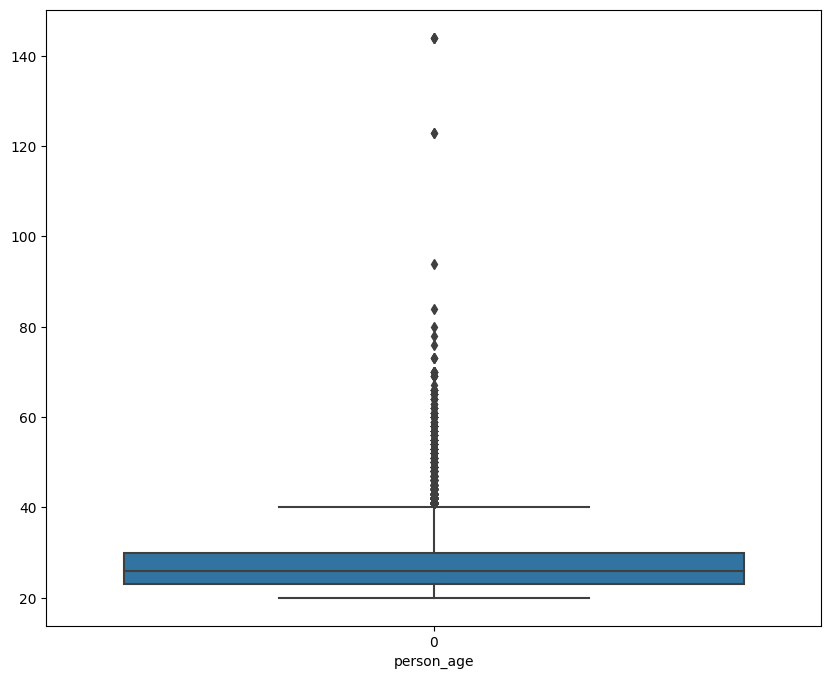

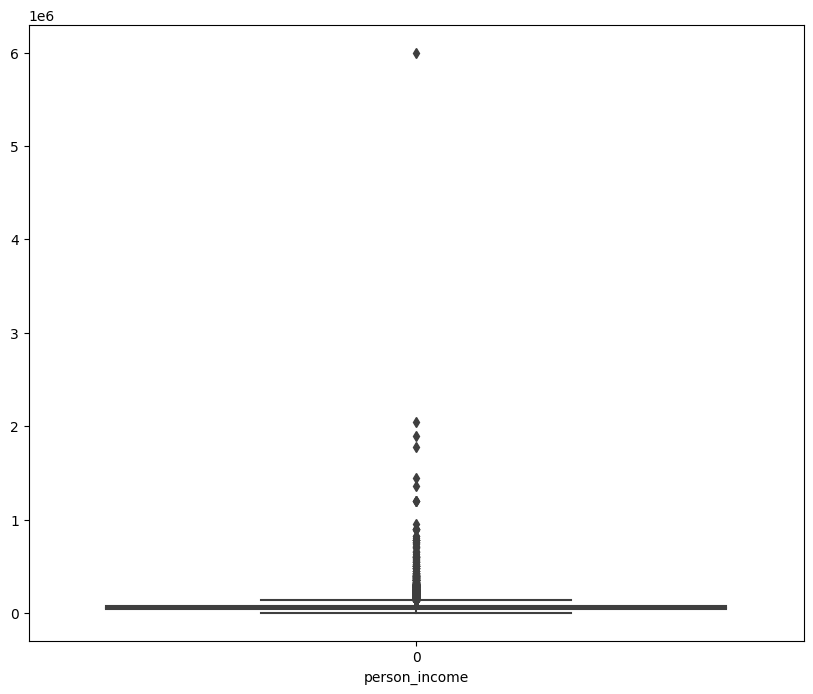

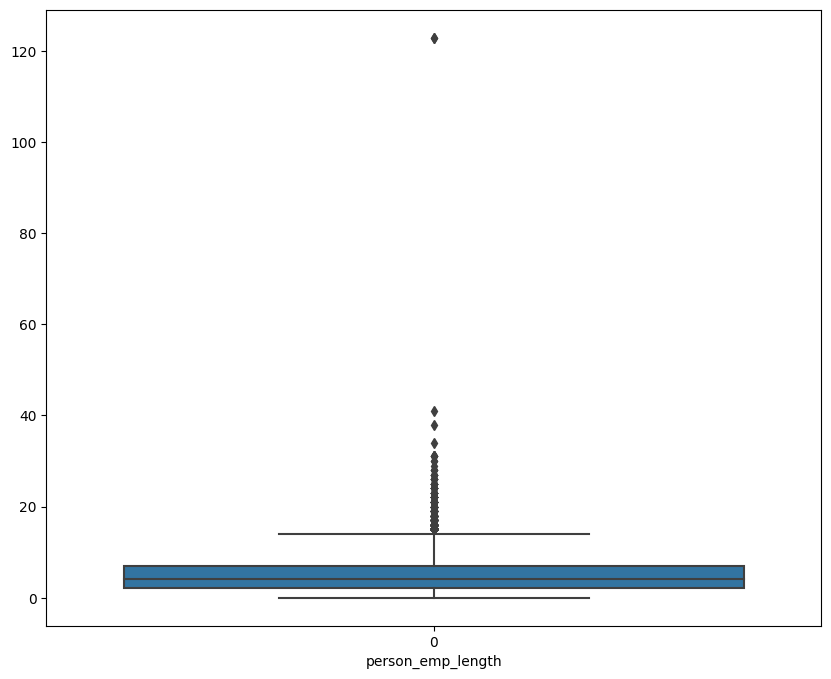

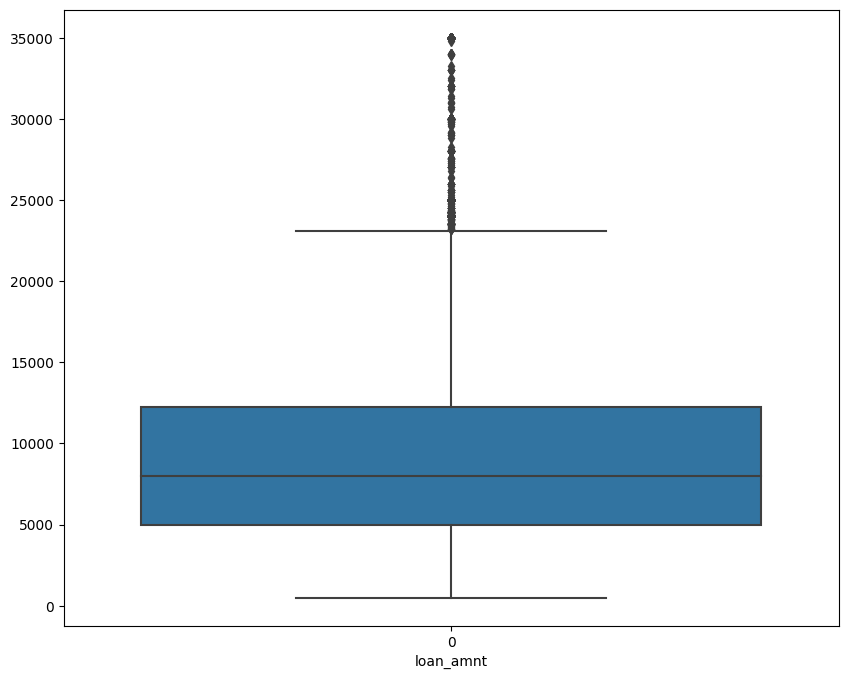

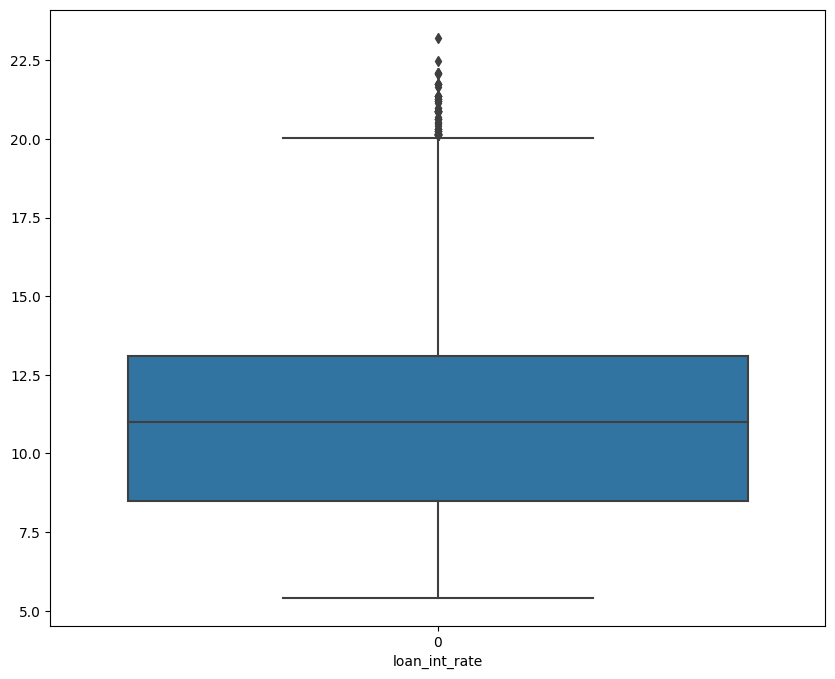

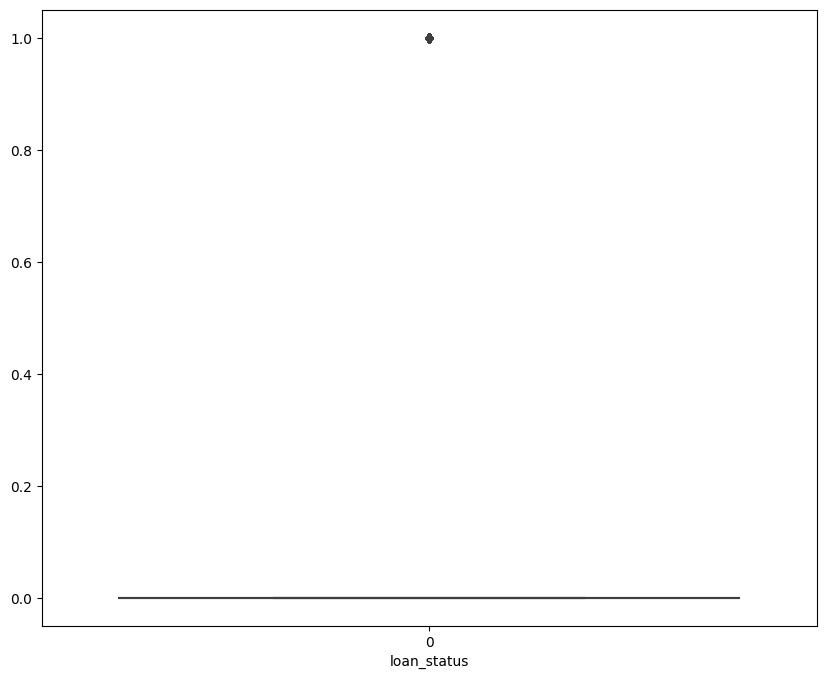

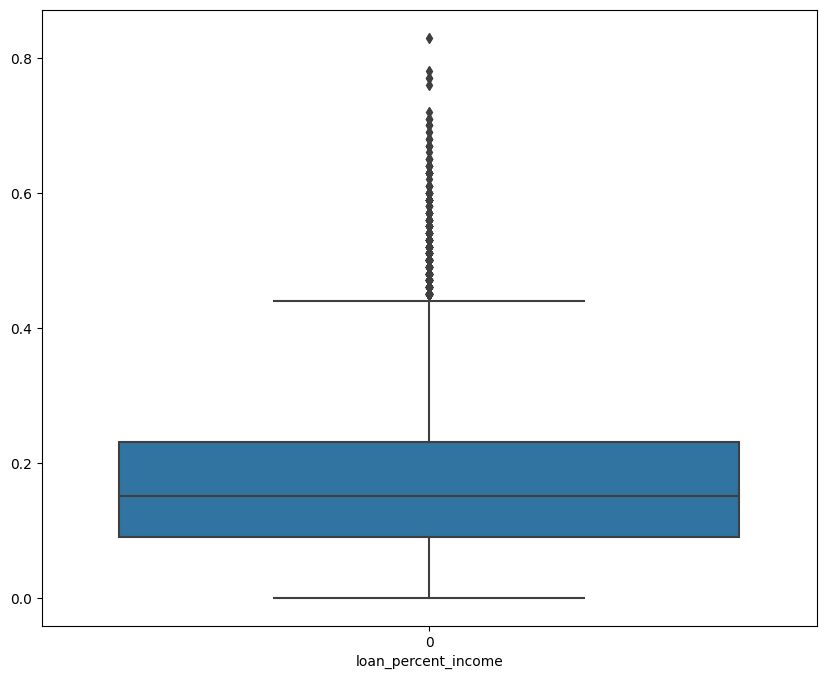

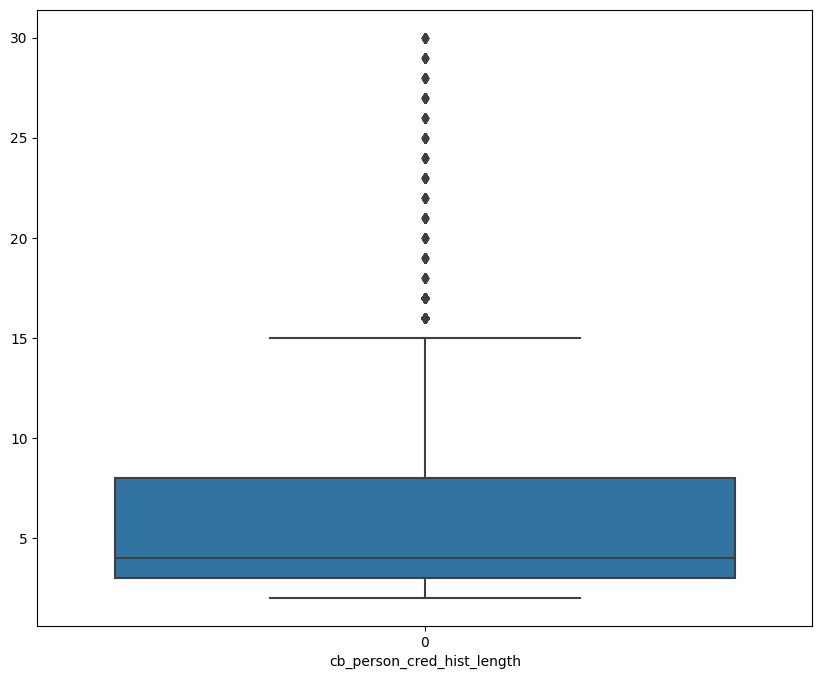

In [17]:
for column in df.select_dtypes(exclude = 'object'):
    plt.figure(figsize=(10,8))
    sns.boxplot(data = df[column])
    plt.xlabel(column)

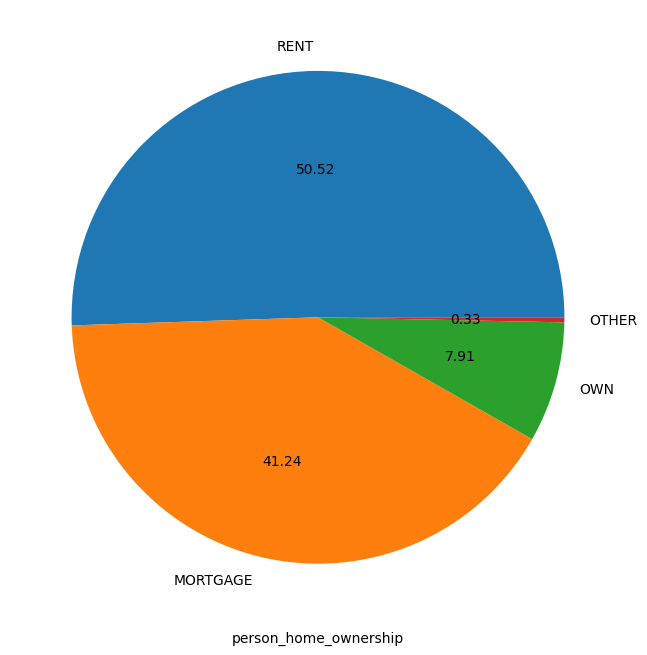

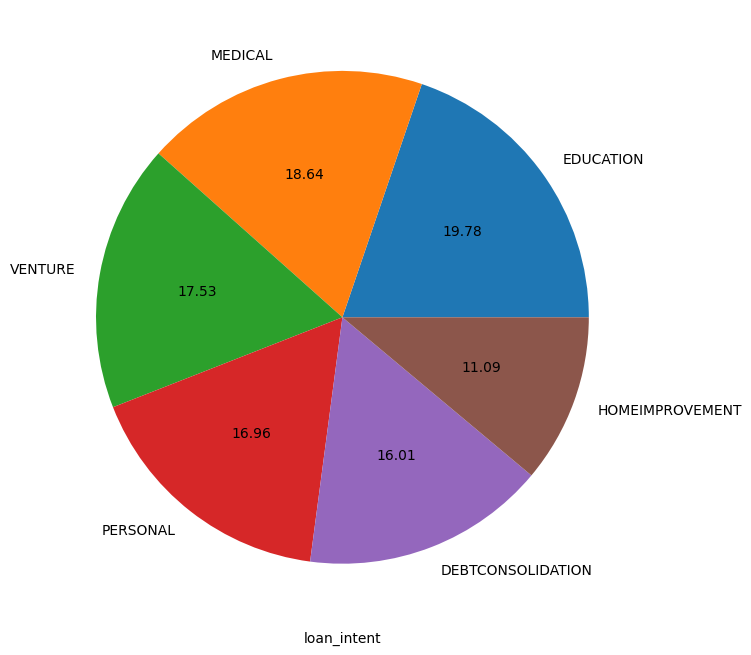

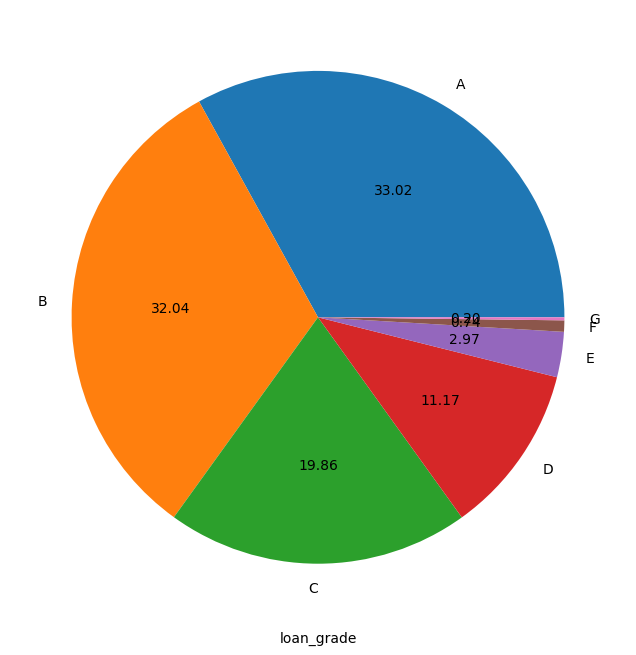

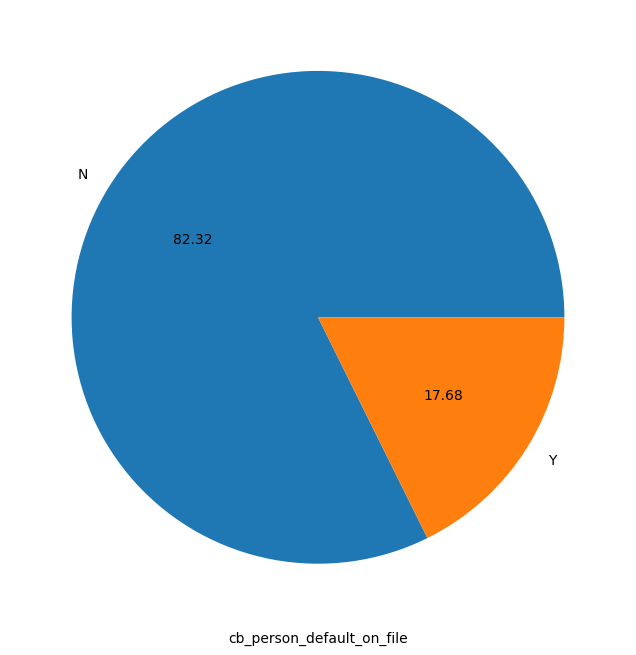

In [18]:
for column in df.select_dtypes(include='object'):
    plt.figure(figsize=(10,8))
    plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct ='%.2f')
    plt.xlabel(column)

<Axes: >

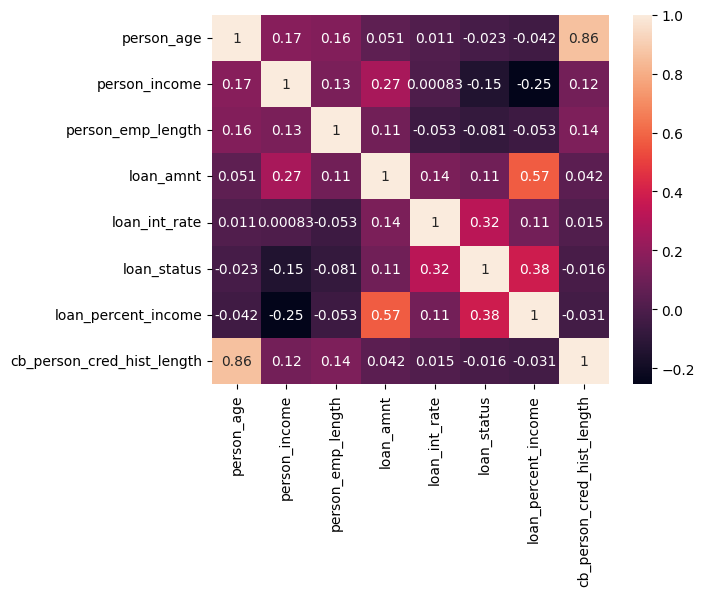

In [19]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)

In [20]:
q = df['person_emp_length'].quantile(0.99)
df_cleaned = df[df['person_emp_length']<q]

q = df['person_income'].quantile(0.99)
df_cleaned = df[df['person_income']<q]

In [21]:
df_cleaned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## MODEL PREPROCESSING

In [22]:
lencoder = LabelEncoder()
for column in df_cleaned.select_dtypes(include='object'):
    df_cleaned[column] = lencoder.fit_transform(df_cleaned[column])

In [23]:
df_cleaned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [24]:
X = df_cleaned.drop(columns = ['loan_status'])
Y = df_cleaned['loan_status']

In [25]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

X_scaled = stdscaler.fit_transform(X)

In [26]:
X_scaled

array([[-0.90885622, -0.10539652,  0.91686035, ...,  3.92349965,
         2.16237643, -0.68822229],
       [-1.06870711, -1.55749518,  0.21850441, ..., -0.67017437,
        -0.46245417, -0.93603766],
       [-0.42930356, -1.55749518, -1.17820747, ...,  3.73600276,
        -0.46245417, -0.68822229],
       ...,
       [ 5.96473196,  0.39431355,  0.91686035, ...,  2.70476981,
        -0.46245417,  5.50716183],
       [ 4.52607397,  2.56952207, -1.17820747, ..., -0.67017437,
        -0.46245417,  5.0115311 ],
       [ 6.12458285, -0.60510659,  0.91686035, ..., -0.20143212,
        -0.46245417,  6.00279256]])

In [27]:
#rain test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size =0.2,random_state=42)

In [28]:
x_train.shape

(25650, 11)

In [29]:
x_test.shape

(6413, 11)

In [30]:
y_train.shape

(25650,)

In [31]:
y_test.shape

(6413,)

## MODELLING

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## METRICS CALCULATION

In [34]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [35]:
print(accuracy)

0.8493684702947139


In [36]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_test, y_pred)

In [37]:
print(pd.DataFrame(confmat))

      0    1
0  4790  248
1   718  657


In [38]:
TP = confmat[1][1]
TN = confmat[0][0]
FP = confmat[0][1]
FN = confmat[1][0]

In [39]:
accuracy = (TP + TN)/(TP+TN +FP+FN)
accuracy

0.8493684702947139

In [40]:
recall = TP/(TP+FN)
recall

0.4778181818181818

In [41]:
precision = TP/(TP+FN)
precision

0.4778181818181818

In [42]:
specificity = TN/(TN+FP)
specificity

0.9507741167129813

In [43]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5038
           1       0.73      0.48      0.58      1375

    accuracy                           0.85      6413
   macro avg       0.80      0.71      0.74      6413
weighted avg       0.84      0.85      0.84      6413



In [44]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7142961492655816

In [45]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

 ## ROC CURVE 

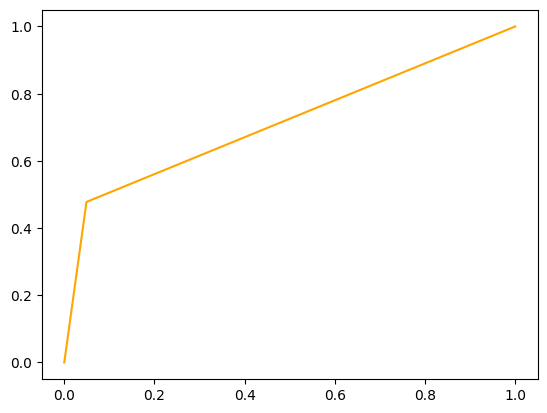

In [46]:
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,0], [1,1], color = 'darkblue', linestyle ='--')